# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import math
import random

import matplotlib.pyplot as plt

from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

# Feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

# Result storage

In [52]:
df_statistical_tests = pd.DataFrame()
df_predictions_per_model = pd.DataFrame()

# Data Loading

In [12]:
df= pd.read_csv('./diabetes.csv', low_memory=False, sep=',')

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Target and Feature distribution

0    500
1    268
Name: Outcome, dtype: int64

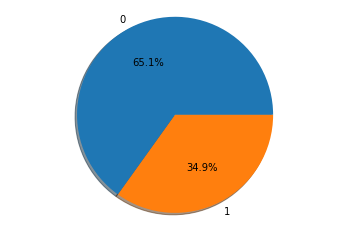

In [14]:
display(df['Outcome'].value_counts())

plt.pie( df['Outcome'].value_counts() , labels=['0','1'], 
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Preprocessing

In [16]:
X = df.drop(['Outcome'],axis=1)
Y = df['Outcome']


# Baseline

In [53]:
# Prediction = false 
Y_all_false = [0 for i in range(0, len(Y))]
df_statistical_tests = df_statistical_tests.append({
    'Type': 'Baseline All false',
    'accuracy': accuracy_score(Y, Y_all_false),
    'precision': precision_score(Y, Y_all_false), 
    'recall': recall_score(Y, Y_all_false)
}, ignore_index=True)


df_predictions_per_model = df_predictions_per_model.append({
    'Type': 'Baseline All false',
    'false': np.size(Y_all_false),
    'false %': 100,
    'true': 0,
    'true %': 0,
}, ignore_index=True)


# Prediction = random
Y_random = [random.choice([0, 1]) for i in range(0, len(Y))]
df_statistical_tests = df_statistical_tests.append({
    'Type': 'Baseline All random',
    'accuracy': accuracy_score(Y, Y_random),
    'precision': precision_score(Y, Y_random), 
    'recall': recall_score(Y, Y_random)
}, ignore_index=True)


df_predictions_per_model = df_predictions_per_model.append({
    'Type': 'Baseline All random',
    'false': np.size(Y_random)-np.sum(Y_random),
    'false %': (np.size(Y_random)-np.sum(Y_random))/np.size(Y_random),
    'true':np.sum(Y_random),
    'true %': (np.sum(Y_random))/np.size(Y_random),
}, ignore_index=True)

display(df_statistical_tests)
display(df_predictions_per_model)

C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Type,accuracy,precision,recall
0,Baseline All false,0.651042,0.000000,0.000000
1,Baseline All random,0.488281,0.323944,0.429104


,Type,false,false %,true,true %
0,Baseline All false,768.0,100.00000,0.0,0.00000
1,Baseline All random,413.0,0.53776,355.0,0.46224


# Random Forrest: Different Parameters

In [39]:
clf = RandomForestClassifier()

parameter_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 20, 30, 50]
}
cv_grid = GridSearchCV(clf, parameter_grid, cv=3, verbose=10, n_jobs=-1, scoring=['accuracy', 'precision', 'recall'], refit='accuracy')
cv_grid.fit(X, Y)

print(cv_grid.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0403s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0313s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   11.7s


{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   12.6s finished


# Random Forrest: Prediction

In [54]:
clf = make_pipeline(RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=50))
clf.fit(X, Y)

# CV
cv_result = cross_validate(clf, X, Y, cv=3, scoring = ['accuracy', 'precision', 'recall'], n_jobs=-1)
df_statistical_tests = df_statistical_tests.append({
    'Type': 'RandomForest',
    'accuracy': cv_result['test_accuracy'].mean(),
    'precision': cv_result['test_precision'].mean(),
    'recall': cv_result['test_recall'].mean()
}, ignore_index=True)

display(df_statistical_tests)

# Predict
y_prediction = clf.predict(X)

unique_elements, counts_elements = np.unique(y_prediction, return_counts=True)

df_predictions_per_model = df_predictions_per_model.append({
    'Type': 'RandomForest',
    'false': counts_elements[0],
    'false %': int(round(counts_elements[0]/(counts_elements[0]+counts_elements[1])*100.0)),
    'true': counts_elements[1],
    'true %': int(round(counts_elements[1]/(counts_elements[0]+counts_elements[1])*100.0)),
}, ignore_index=True)

df_predictions_per_model

,Type,accuracy,precision,recall
0,Baseline All false,0.651042,0.000000,0.000000
1,Baseline All random,0.488281,0.323944,0.429104
2,RandomForest,0.768229,0.719230,0.566916


,Type,false,false %,true,true %
0,Baseline All false,768.0,100.00000,0.0,0.00000
1,Baseline All random,413.0,0.53776,355.0,0.46224
2,RandomForest,500.0,65.00000,268.0,35.00000


# SVM: Different Parameters

In [43]:
clf = SVC()

parameter_grid= {
    'C': [x for x in np.linspace(start = 0.01, stop = 0.99, num = 100)]    
}
                     
cv_grid = GridSearchCV(clf, parameter_grid, cv=3, verbose=10, n_jobs=-1, scoring=['accuracy', 'precision', 'recall'], refit='accuracy')
cv_grid.fit(X, Y)

print(cv_grid.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0312s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0690s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1068s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    0.9s


{'C': 0.9108080808080807}


[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.3s finished


# SVM: Different Scaling

In [44]:
clf = make_pipeline(SVC(C = 0.9108080808080807))
clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)

print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.73828125 0.75       0.765625  ]
0.7513020833333334


In [45]:
clf = make_pipeline(StandardScaler(),SVC(C=0.9108080808080807))
clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)

print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.7578125  0.76171875 0.80078125]
0.7734375


In [61]:
clf = make_pipeline(RobustScaler(),SVC(C=0.9108080808080807))
clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)

print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.74609375 0.76171875 0.79296875]
0.7669270833333334


# SVM: Prediction

In [55]:
clf = make_pipeline(StandardScaler(),SVC(C=0.9108080808080807))
clf.fit(X, Y)
# CV
cv_result = cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)
df_statistical_tests = df_statistical_tests.append({
    'Type': 'SVC',
    'accuracy': cv_result['test_accuracy'].mean(),
    'precision': cv_result['test_precision'].mean(),
    'recall': cv_result['test_recall'].mean()
}, ignore_index=True)

display(df_statistical_tests)

# Predict
y_prediction = clf.predict(X)

unique_elements, counts_elements = np.unique(y_prediction, return_counts=True)

df_predictions_per_model = df_predictions_per_model.append({
    'Type': 'SVC',
    'false': counts_elements[0],
    'false %': int(round(counts_elements[0]/(counts_elements[0]+counts_elements[1])*100.0)),
    'true': counts_elements[1],
    'true %': int(round(counts_elements[1]/(counts_elements[0]+counts_elements[1])*100.0)),
}, ignore_index=True)

df_predictions_per_model

,Type,accuracy,precision,recall
0,Baseline All false,0.651042,0.000000,0.000000
1,Baseline All random,0.488281,0.323944,0.429104
2,RandomForest,0.768229,0.719230,0.566916
3,SVC,0.766927,0.726188,0.544694


,Type,false,false %,true,true %
0,Baseline All false,768.0,100.00000,0.0,0.00000
1,Baseline All random,413.0,0.53776,355.0,0.46224
2,RandomForest,500.0,65.00000,268.0,35.00000
3,SVC,562.0,73.00000,206.0,27.00000


# NuSVC: Different Parameter

In [48]:
clf = NuSVC()

parameter_grid= {
    'nu': [x for x in np.linspace(start = 0.01, stop = 0.99, num = 100)]    
}
                     
cv_grid = GridSearchCV(clf, parameter_grid, cv=3, verbose=10, n_jobs=-1, scoring=['accuracy', 'precision', 'recall'], refit='accuracy')
cv_grid.fit(X, Y)

print(cv_grid.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0302s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0604s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1831s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    3.8s


{'nu': 0.5643434343434344}


[Parallel(n_jobs=-1)]: Done 287 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.8s finished


# NuSVC: Different Scaling

In [28]:
clf = make_pipeline(NuSVC(nu=0.5643434343434344))
clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)

print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.734375   0.75390625 0.76953125]
0.7526041666666666


In [29]:
clf = make_pipeline(StandardScaler(), NuSVC(nu=0.5643434343434344))
clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)

print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.74609375 0.73828125 0.8203125 ]
0.7682291666666666


In [30]:
clf = make_pipeline(RobustScaler(), NuSVC(nu=0.5643434343434344))
clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)

print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.73828125 0.75       0.8203125 ]
0.76953125


In [31]:
clf = make_pipeline(MinMaxScaler(), NuSVC(nu=0.5643434343434344))
clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)

print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.734375   0.7421875  0.79296875]
0.7565104166666666


# NuSVC: Prediction

In [56]:
clf = make_pipeline(RobustScaler(), NuSVC(nu=0.5643434343434344))
clf.fit(X, Y)

# CV
cv_result = cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)
df_statistical_tests = df_statistical_tests.append({
    'Type': 'NuSVC',
    'accuracy': cv_result['test_accuracy'].mean(),
    'precision': cv_result['test_precision'].mean(),
    'recall': cv_result['test_recall'].mean()
}, ignore_index=True)

display(df_statistical_tests)

# Predict
y_prediction = clf.predict(X)

unique_elements, counts_elements = np.unique(y_prediction, return_counts=True)

df_predictions_per_model = df_predictions_per_model.append({
    'Type': 'NuSVC',
    'false': counts_elements[0],
    'false %': int(round(counts_elements[0]/(counts_elements[0]+counts_elements[1])*100.0)),
    'true': counts_elements[1],
    'true %': int(round(counts_elements[1]/(counts_elements[0]+counts_elements[1])*100.0)),
}, ignore_index=True)

df_predictions_per_model

,Type,accuracy,precision,recall
0,Baseline All false,0.651042,0.000000,0.000000
1,Baseline All random,0.488281,0.323944,0.429104
2,RandomForest,0.768229,0.719230,0.566916
3,SVC,0.766927,0.726188,0.544694
4,NuSVC,0.759115,0.715532,0.522222


,Type,false,false %,true,true %
0,Baseline All false,768.0,100.00000,0.0,0.00000
1,Baseline All random,413.0,0.53776,355.0,0.46224
2,RandomForest,500.0,65.00000,268.0,35.00000
3,SVC,562.0,73.00000,206.0,27.00000
4,NuSVC,565.0,74.00000,203.0,26.00000


# Neural Network: Different Parameters

In [50]:
clf = MLPClassifier()

parameter_grid= {
    'max_iter': [10,50,100,150,200,300,1000],
    'hidden_layer_sizes' : [(2,2),(3,3),(10,4)]
}
                     
cv_grid = GridSearchCV(clf, parameter_grid, cv=3, verbose=10, n_jobs=-1, scoring=['accuracy', 'precision', 'recall'], refit='accuracy')
cv_grid.fit(X, Y)

print(cv_grid.best_params_)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0313s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0546s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  56 out of  63 | elapsed:   17.2s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:   23.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:   23.4s finished


{'hidden_layer_sizes': (3, 3), 'max_iter': 1000}


In [34]:
clf = MLPClassifier(hidden_layer_sizes=(3,3), max_iter = 1000)

clf.fit(X, Y)

scores= cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)

print(scores["test_accuracy"])
print(np.mean(scores["test_accuracy"]))

[0.64453125 0.73046875 0.68359375]
0.6861979166666666


# MLP: Prediction

In [57]:
clf = MLPClassifier(hidden_layer_sizes=(3, 3), max_iter = 1000)
clf.fit(X, Y)

# CV
cv_result = cross_validate(clf, X, Y, cv=3, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)
df_statistical_tests = df_statistical_tests.append({
    'Type': 'MLP',
    'accuracy': cv_result['test_accuracy'].mean(),
    'precision': cv_result['test_precision'].mean(),
    'recall': cv_result['test_recall'].mean()
}, ignore_index=True)

display(df_statistical_tests)

# Predict
y_prediction = clf.predict(X)

unique_elements, counts_elements = np.unique(y_prediction, return_counts=True)

df_predictions_per_model = df_predictions_per_model.append({
    'Type': 'MLP',
    'false': counts_elements[0],
    'false %': int(round(counts_elements[0]/(counts_elements[0]+counts_elements[1])*100.0)),
    'true': counts_elements[1],
    'true %': int(round(counts_elements[1]/(counts_elements[0]+counts_elements[1])*100.0)),
}, ignore_index=True)

df_predictions_per_model

,Type,accuracy,precision,recall
0,Baseline All false,0.651042,0.000000,0.000000
1,Baseline All random,0.488281,0.323944,0.429104
2,RandomForest,0.768229,0.719230,0.566916
3,SVC,0.766927,0.726188,0.544694
4,NuSVC,0.759115,0.715532,0.522222
5,MLP,0.651042,0.166667,0.003704


,Type,false,false %,true,true %
0,Baseline All false,768.0,100.00000,0.0,0.00000
1,Baseline All random,413.0,0.53776,355.0,0.46224
2,RandomForest,500.0,65.00000,268.0,35.00000
3,SVC,562.0,73.00000,206.0,27.00000
4,NuSVC,565.0,74.00000,203.0,26.00000
5,MLP,767.0,100.00000,1.0,0.00000


# Significance Test

In [59]:
df_statistical_tests_complete = df_statistical_tests.copy()

df_statistical_tests_complete = df_statistical_tests_complete.set_index('Type')
display(df_statistical_tests_complete)
print()

measure = 'accuracy'

df_statistical_tests_accuracy =  df_statistical_tests_complete.tail(4).copy()[[measure]]
df_statistical_tests_accuracy['%s(Baseline All false)' % measure] = df_statistical_tests_complete.iloc[0][measure]
df_statistical_tests_accuracy['%s(Baseline All random)' % measure] = df_statistical_tests_complete.iloc[1][measure]
df_statistical_tests_accuracy['%s(RandomForest)' % measure] = df_statistical_tests_complete.iloc[2][measure]

display (df_statistical_tests_accuracy)

measure = 'precision'

df_statistical_tests_precision =  df_statistical_tests_complete.tail(4).copy()[[measure]]
df_statistical_tests_precision['%s(Baseline All false)' % measure] = df_statistical_tests_complete.iloc[0][measure]
df_statistical_tests_precision['%s(Baseline All random)' % measure] = df_statistical_tests_complete.iloc[1][measure]
df_statistical_tests_precision['%s(RandomForest)' % measure] = df_statistical_tests_complete.iloc[2][measure]

display (df_statistical_tests_precision)

measure = 'recall'

df_statistical_tests_recall =  df_statistical_tests_complete.tail(4).copy()[[measure]]
df_statistical_tests_recall['%s(Baseline All false)' % measure] = df_statistical_tests_complete.iloc[0][measure]
df_statistical_tests_recall['%s(Baseline All random)' % measure] = df_statistical_tests_complete.iloc[1][measure]
df_statistical_tests_recall['%s(RandomForest)' % measure] = df_statistical_tests_complete.iloc[2][measure]

display (df_statistical_tests_recall)

,accuracy,precision,recall
Type,,,
Baseline All false,0.651042,0.000000,0.000000
Baseline All random,0.488281,0.323944,0.429104
RandomForest,0.768229,0.719230,0.566916
SVC,0.766927,0.726188,0.544694
NuSVC,0.759115,0.715532,0.522222
MLP,0.651042,0.166667,0.003704


,accuracy,accuracy(Baseline All false),accuracy(Baseline All random),accuracy(RandomForest)
Type,,,,
RandomForest,0.768229,0.651042,0.488281,0.768229
SVC,0.766927,0.651042,0.488281,0.768229
NuSVC,0.759115,0.651042,0.488281,0.768229
MLP,0.651042,0.651042,0.488281,0.768229


,precision,precision(Baseline All false),precision(Baseline All random),precision(RandomForest)
Type,,,,
RandomForest,0.719230,0.0,0.323944,0.71923
SVC,0.726188,0.0,0.323944,0.71923
NuSVC,0.715532,0.0,0.323944,0.71923
MLP,0.166667,0.0,0.323944,0.71923


,recall,recall(Baseline All false),recall(Baseline All random),recall(RandomForest)
Type,,,,
RandomForest,0.566916,0.0,0.429104,0.566916
SVC,0.544694,0.0,0.429104,0.566916
NuSVC,0.522222,0.0,0.429104,0.566916
MLP,0.003704,0.0,0.429104,0.566916
